In [1]:
%matplotlib inline
import numpy as np
import scqubits as scq
import matplotlib.pyplot as plt

# SNAIL Hamiltonian in the charge basis

$$ H=-4E_\text{
        C}\partial_\phi^2-\alpha E_\text{J}\cos(\phi) -n E_\text{J}\cos([\phi - \varphi_\text{ext}] / n)$$
        
We do a cononical transformation: $$\hat{\phi} \rightarrow n\hat{\phi}, \hat{N} \rightarrow \hat{N}/n $$

$$\Rightarrow H_\text{sn}=-4\frac{E_\text{
        C}}{n^2}\partial_\phi^2-\alpha E_\text{J}\cos(n\phi) -n E_\text{J}\cos(\phi - \varphi_\text{ext}/ n)$$
   
$$\Rightarrow H_\text{sn}=-4\frac{E_\text{
        C}}{n^2}\hat{N}^2-\alpha \frac{E_\text{J}}{2}(e^{i n\phi}+e^{-i n\phi}) -n E_\text{J}(e^{i \phi}e^{-i\varphi_\text{ext}/ n} + e^{-i \phi}e^{+i\varphi_\text{ext}/ n})$$
 
 Writing in the charge basis:
 
 $$\Rightarrow H_\text{sn}=-4\frac{E_\text{
        C}}{n^2}\sum_j j^2\left|j\right>\left<j\right|-\alpha \frac{E_\text{J}}{2}\sum_j(\left|j+n\right>\left<j\right|+ \left|j\right>\left<j+n\right|) -n E_\text{J}\sum_j(e^{-i\varphi_\text{ext}/ n}\left|j+1\right>\left<j\right| + e^{i\varphi_\text{ext}/ n}\left|j\right>\left<j+1\right|)$$

In [30]:
sn = scq.SNAIL_D.create()

Output()

In [31]:
ens = sn.eigenvals()
ens-ens[0]

array([0.        , 1.0521729 , 2.51388635, 4.18188945, 6.01263538,
       7.97430396])

In [32]:
# sn = scq.SNAIL(EJ=47,EC=.1,flux=0.31,alpha=0.0,n=3,ncut=31)
flux_list = np.linspace(-0.6, 0.6, 150)
ens_list=[]
for flux in flux_list:
    sn.flux = flux
    ens= sn.eigenvals()
    ens_list.append(ens-ens[0])
ens_list = np.array(ens_list)

Text(0, 0.5, 'Frequency(GHz)')

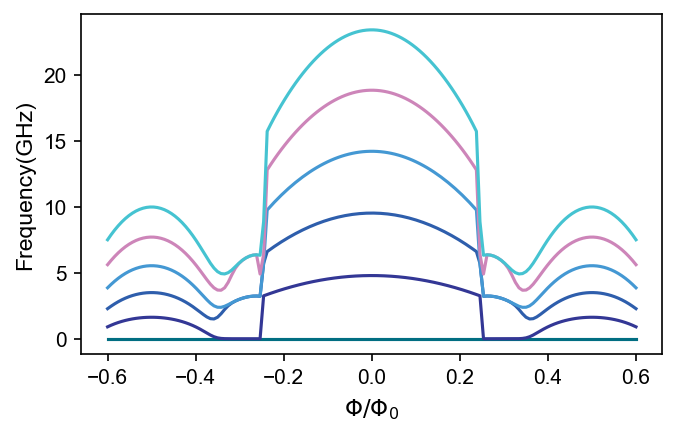

In [33]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
for ens in ens_list.T:
    ax.plot(flux_list,ens)
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

Text(0, 0.5, 'Frequency(GHz)')

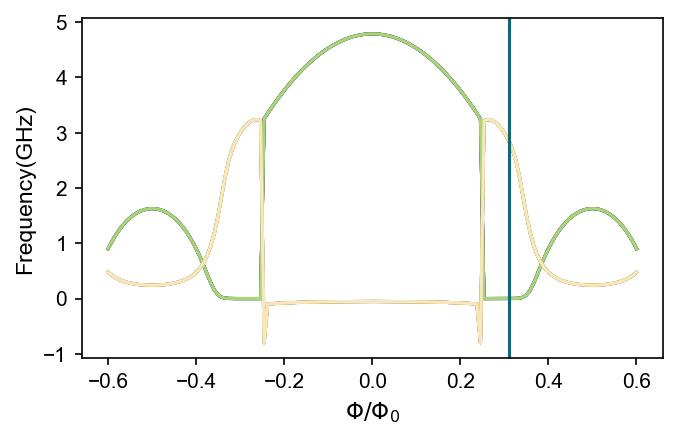

In [34]:
alphas = [ens_list.T[ii+1]-2*ens_list.T[ii] for ii in range(4)]

fig,ax = plt.subplots(1,1,figsize=(5,3))
for ens in ens_list.T:
    ax.plot(flux_list,alphas[0])
    ax.plot(flux_list,alphas[1])
ax.axvline(0.31)
ax.set_xlabel('$\Phi/\Phi_0$')
ax.set_ylabel('Frequency(GHz)')

In [41]:
ind = np.argmin(abs(flux_list-0.51))
ens = ens_list[ind]

In [4]:
sn.hilbertdim()

221

 c:\_lib\python\scqubits\scqubits\core\snail.py: 147ComplexWarning: Casting complex values to real discards the imaginary part
 c:\_lib\python\scqubits\scqubits\core\snail.py: 150

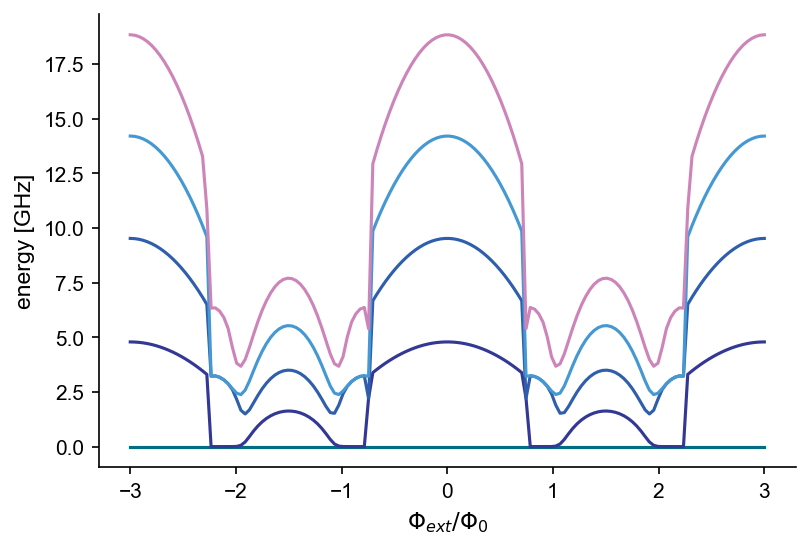

In [15]:
flux_list = np.linspace(-3, 3, 150)
ens = sn.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True);

In [12]:
ens

(<Figure size 900x600 with 1 Axes>,
 <AxesSubplot:xlabel='$\\Phi_{ext}/\\Phi_0$', ylabel='energy [GHz]'>)

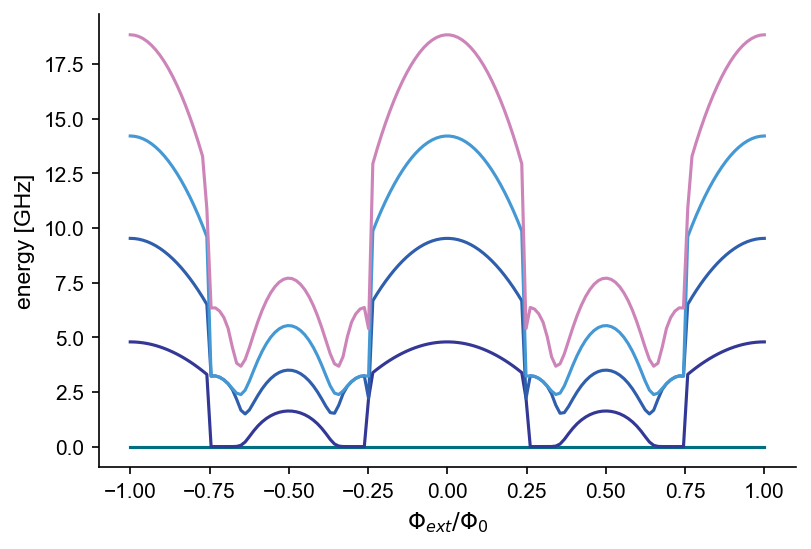

In [9]:
flux_list = np.linspace(-1, 1, 150)
sn_d.plot_evals_vs_paramvals('flux', flux_list, evals_count=5, subtract_ground=True);

In [23]:
# Set up parameter name and values
# pname1 = 'flux'
# flux_vals = np.linspace(-1.6, 1.6, 501)


# # combine into a dictionary
# paramvals_by_name = {pname1: flux_vals}


# def update_hilbertspace(flux):  # function that defines how Hilbert space components are updated
#     sn = flux

# # dictionary with information on which subsystems are affected by changing parameters
# subsys_update_info = {pname1: [sn]}
# hspace = scq.HilbertSpace([sn])

# # create the ParameterSweep
# sweep = scq.ParameterSweep(
#     hilbertspace=hspace,
#     paramvals_by_name=paramvals_by_name,
#     update_hilbertspace=update_hilbertspace,
#     evals_count=20,
#     subsys_update_info=subsys_update_info,
#     num_cpus=4,
# )


In [12]:
tq.hilbertdim()

221

In [18]:
dimension = tq.hilbertdim()
n = 3
entries = np.repeat(1.0, dimension - n)
exp_op = np.diag(entries, -n)

In [20]:
dimension = tq.hilbertdim()
entries = np.repeat(1.0, dimension - 1)
exp_op = np.diag(entries, -1)


In [21]:
exp_op

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,